In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = 16,8

from collections import Counter,defaultdict
from itertools import chain, combinations

import warnings
warnings.filterwarnings('ignore')

import imshow
from wordcloud import WordCloud
from PIL import Image

import re
from collections import Counter
from itertools import chain
import pickle

import sent2vec
import hnswlib


In [2]:
from py_file.total_processing import *
kp = konlpy_preprocessing()

In [3]:
train = pd.read_json('/home/ubuntu/workspace/jh/project/data/train.json')

In [4]:
s2v_model = sent2vec.Sent2vecModel()
s2v_model.load_model('/home/ubuntu/workspace/jh/project/model/s2v_model.bin')

p_title = pickle.load(open('/home/ubuntu/workspace/jh/project/model/p_title.pickle', 'rb'))
p_tags = pickle.load(open('/home/ubuntu/workspace/jh/project/model/p_tags.pickle', 'rb'))
p_new_tags = pickle.load(open('/home/ubuntu/workspace/jh/project/model/p_new_tags.pickle', 'rb'))

In [9]:
def s2v_visual(text):
    kk = 10

    test_tag = kp.konlpy_preprocessing(text)

    test_tag = test_tag.split()
    test_tag = " ".join([i for i in test_tag if s2v_model.embed_sentence(i).sum() != 0])

    if s2v_model.embed_sentence(test_tag).sum() == 0.0:
        print()    
    else:
        emb = s2v_model.embed_sentence(test_tag)
        title_labels, title_distances = p_title.knn_query(emb, k = kk, num_threads=8)
        tag_labels, tags_distances = p_tags.knn_query(emb, k = kk, num_threads=8)
        new_tag_labels, new_tags_distances = p_new_tags.knn_query(emb, k = kk, num_threads=8)

        reco_idx = list(chain.from_iterable(zip(title_labels.reshape(-1),tag_labels.reshape(-1),new_tag_labels.reshape(-1))))
        
        s2v_count = Counter(np.concatenate(train.iloc[reco_idx]['tags'].tolist()))
        s2v_words = dict(s2v_count.most_common())

        fig, ax = plt.subplots()
        wc = WordCloud(font_path=r'/home/ubuntu/workspace/font/GmarketSansTTFMedium.ttf',
                        max_words=100,
                        background_color='white',
                        color_func = color_func,
                        relative_scaling  = 0.2,
                        width = 3000,
                        height = 2000)

        wc.generate_from_frequencies(s2v_words)

        ax.imshow(wc,interpolation='bilinear')
        ax.axis('off')
            
        plt.show()
        # plt.savefig(f'/home/ubuntu/workspace/fffff/sent2vec_{text}.png',dpi=1000)
        return reco_idx

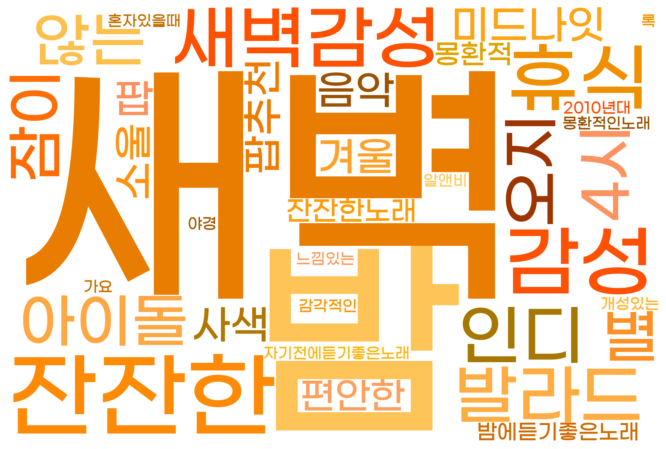

<Figure size 1152x576 with 0 Axes>

In [14]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return(f"hsl({np.random.randint(18,45)},{np.random.randint(99,100)}%, {np.random.randint(30,70)}%)")
    #  
x = s2v_visual('밤이나 새벽에 듣기 좋은 잔잔한 노래')